In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### 01. 因數

In [2]:
sp.ntheory.factorint(88)

{2: 3, 11: 1}

意思是

$$88 = 2^3 \times 11^1$$

我們想列全部的因數呢?

In [3]:
n=6

sp.ntheory.divisors(n)

[1, 2, 3, 6]

我們當然也可以列出 $n$ 的所有 proper divisors。

In [4]:
egg = sp.ntheory.divisors(n)[:-1]

sum(egg)

6

#### Perfect Number (完美數)

把除了自己以外的因數相加, 就是自己的數, 就叫完美數。比如說:

$$ 6 = 1 + 2 + 3$$

我們當然可以寫個程式, 但是...

In [5]:
sp.ntheory.factor_.is_perfect(6)

True

當然, 覺得這樣太醜, 也可以讀進這個指令。

In [6]:
from sympy.ntheory.factor_ import is_perfect

In [7]:
is_perfect(28)

True

如果我們要自己檢查, 要用這樣的方式。

In [8]:
egg = sp.ntheory.divisors(28)[:-1]

In [9]:
egg

[1, 2, 4, 7, 14]

Python 內建了加總的功能!

In [10]:
sum(egg)

28

#### 【練習 A】判斷是否為完美數

寫一個 `isPrefect(n)` 函式, 輸入 `n`, 如果 `n` 是完美數, 輸出 `True`; 否則輸出 `False`。

### 02. 質數

`Sympy` 有很多方便的質數功能, 讓我們快速的去和質數玩耍。首先, 基本的看一個數字是不是質數。

In [11]:
sp.isprime(87)

False

In [12]:
sp.isprime(82589933)

True

哦哦, 這 $82589933$ 是怎麼出現的啊? 等等我們會知道這是一個重要的質數。Python「無限長度」的整數特性, 真的讓我們玩起來無比方便!

In [13]:
sp.isprime(170141183460469231731687303715884105727)

True

是不是太炫了!?

#### 【練習】質數日

2019年8月23日, 我們寫成一個數字: 20190823, 會發現這是一個質數! 很令人吃驚的是, 質數日其實不是很多, 這一千年才 53 個!! 你試試我們還有沒有機會碰到下一個質數日!

In [11]:
sp.isprime(20190823)

True

#### 下一個質數

很大的質數是保障我們網路安全的超級重要功臣! 我們之後會開始思考怎麼樣找很大的質數出來。我們可以知道任意正整數, 下一個質數是什麼嗎?

In [12]:
sp.nextprime(170141183460469231731687303715884105727)

170141183460469231731687303715884105757

#### 第 87 號質數

In [13]:
sp.prime(87)

449

#### 【練習】計算質數間距

兩個連續質數, 編號 $P_{n}$ 和 $P_{n+1}$ 的間距, 會不會因為 $n$ 越來越大之後這個間距

$$P_{n+1}-P_n$$

也越來越大呢? 而連續兩個質數最小可能差就是差 $2$, 這種情況我們叫這對質數是孿生質數。數學有個「孿生質數猜想」, 就是孿生質數有無限多對。

我們先來感受一下某個區間練續兩個質數差的狀況。

In [14]:
egg = []

for k in range(9487,9588):
    egg.append(sp.prime(k+1) - sp.prime(k))
    

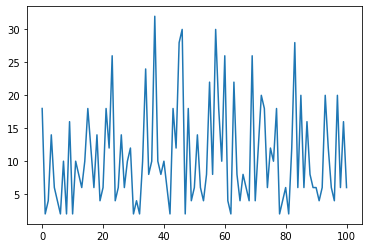

In [15]:
plt.plot(egg)

似乎不時會出現孿生質數, 最大間距是多少我們也可以看一下。

In [16]:
max(egg)

32

我們可以看出最大間隔在 $32$。如果一路下去, 間隔會不會越來越大呢?

#### 【練習B】孿生質數

試著算某個數字很大的區間, 相鄰質數的距離, 並找出此區間的孿生質數。

#### 一個範圍中的質數



In [20]:
list(sp.primerange(1, 20))

[2, 3, 5, 7, 11, 13, 17, 19]

#### 質數有無限多個!

Euclid 有個證明質數有無限多個的想法, 就是假設只有有限個質數, 我們一一列出來:

$$p_1, p_2, \ldots, p_n$$

我們考慮

$$p = p_1 \times p_2 \times \cdots \times p_n + 1$$

很顯然如果世界上的質數只有 $p_1, p_2, \ldots, p+n$, 這新的 $p$ 也會是質數!
這樣得到了矛盾。

感覺這好像是個產生大質數的方式。我們來試試!

In [17]:
egg = list(sp.primerange(1,87))

In [18]:
p = 1

for k in egg:
    p = p * k
    
q = p + 1

print(q)

267064515689275851355624017992791


看來還產生一個挺大的「質數候選人」 (其實不算大), 但是遺憾的是...

In [19]:
sp.isprime(q)

False

居然不是質數! 我們分析一下...

In [20]:
sp.ntheory.factorint(q)

{265739: 1, 1004988035964897329167431269: 1}

真的是可以分解的!

### 03. 梅森質數

令 $n$ 為正整數。一個梅森數 $M_n$ 是以下這種型式:

$$M_n = 2^n - 1$$

如果 $n$ 是質數, 且 $M_n$ 為質數。則我們稱 $M_n$ 為梅森質數。

In [21]:
primes = sp.primerange(1, 20)

In [22]:
for p in primes:
    Mp = 2**p - 1
    if sp.isprime(Mp):
        print(f"當 p={p} 時, Mp={Mp} 是梅森質數")
    else:
        print(f"當 p={p} 時不是")

當 p=2 時, Mp=3 是梅森質數
當 p=3 時, Mp=7 是梅森質數
當 p=5 時, Mp=31 是梅森質數
當 p=7 時, Mp=127 是梅森質數
當 p=11 時不是
當 p=13 時, Mp=8191 是梅森質數
當 p=17 時, Mp=131071 是梅森質數
當 p=19 時, Mp=524287 是梅森質數


#### 【練習C】挑戰梅森

算到這裡, 我們可能會以為梅森質數很多。事實上並不多! Marin Mersenne 梅森本人檢查了所有 $M_{n}, n\leq 263$, 看哪個是梅森質數。梅森的結論是:

$$M_2, M_3, M_5, M_7, M_{13}, M_{17}, M_{19}, M_{31}, M_{67}, M_{127}, M_{257}$$

但可惜梅森漏了幾個梅森數, 還把幾個不是梅森數的當成梅森數。你可以想辦法找出所有 $n\leq 263$ 的梅森數 $M_n$ 嗎?

#### 第 51 個梅森數

前面的練習, 在 Python 裡很容易對答案哦! 因為 `sympy` 其實知道所有目前我們知道的梅森數。比方說, 我們要知道第 33 個梅森數中 $2^n - 1$ 的那個 $n$ 是什麼, 就這麼下指令。

第 51 個 Mersenne 質數

    sp.ntheory.factor_.mersenne_prime_exponent(51)

In [23]:
sp.ntheory.factor_.mersenne_prime_exponent(33)

859433

這個就是我們的 $n$。

In [24]:
n = 859433

我們檢查一下這個 $n$ 是不是質數。

In [25]:
sp.isprime(n)

True

果然是! 那我們再檢查一下是不是梅森數。

In [26]:
M859433 = 2**n - 1

Python 一下就算完了! 你可能不太感動, 那是因為我們沒有看到這個數字多可怕! Python 整數可支援到無限長度!

In [27]:
M859433

1294981256042076496665334852555620733841620199174165693701906626756781472408495296919893191078354681555672801516447981373777684271399976099757967651361491258605930367561941670924105472377794579159409692303358105745659695112621540244370163889168035515346158299678809768261124989123310162820729197217759070436317016446473535542118588350300624003448974176844905482475587849345412434334200128745725379283676622982621685237494257656400087821474222181014816423501974616138977155897203390793089765376247745101266035958794774658877738717993087052896169992991898500319132739720840131985842769746834279186764373635321647702445637813582214547109105575469048404014559996942036770979013267195349179525456376858427743668685719190099762143409475057173971632497694064835589771988409987601993008850008788718949080502443371470817665749420125210598899582762265474956854829581265410661936760121143967303663725990008388812646929708977719846707837506426947399287766893105368618917457280287740015656090529112958203343139517

真是太可怕了啊! 你應該連唸一次都不願意吧! 你可以試試 Python 能不能判斷這可怕的數字是不是質數!

    sp.isprime(M859433)
    
不過你可能會發現經過天荒地老也算不出來!

(這時你就要用 `Kernel > Restart` 從一開始執行一次)

我們就發現一件事, 如果要找很大的質數, 其實沒有想像中那麼容易! 並不是你一一測試就可以。

而梅森質數是個很好的找大質數的方式。我們可以看到 859433 也不是很大的質數, 可是可以造出一個很大質數的「候選人」, 我們再想辦法看看這可怕大的候選人是不是質數。

雖然大家都知道這件事, 但因為很大的質數 $p$

$$2^p-1$$

可能就不容易算。當然更難的是確定這是不是質數!

前面說過, 梅森質數比我們想像中的少, 到現在其實也只找到 51 個! 我們可以看看第 51 個的指數部份是那個質數。

In [28]:
sp.ntheory.factor_.mersenne_prime_exponent(51)

82589933

不過呢, 你會發現這時用 Python 算出

$$2^{82589933}-1$$

就沒有這麼容易了...

### 04. 友誼數 amicable number 

兩個數是「好朋友」這是怎麼定義的呢? 還記得完美數是自己的 proper divisor 相加起來等於自己。我們說兩個數 $a, b$ 是友誼數如果:

1. $a$ 所有的 proper divisors 加起來等於 $b$。
2. $b$ 所有的 proper divisors 加起來等於 $a$。

這種數有很多嗎? 大家可以試試看!